In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# OneHotEncoder

In [4]:
import os
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), 
                   header = None, index_col=False,
                   names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                            'marital_status', 'occupation', 'relationship', 'race', 'gender',
                            'capital-gain', 'copital-loss', 'hours-per-week', 'native-country',
                            'income'])

data

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,gender,capital-gain,copital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [25]:
# 데이터의 값들이 정상적인지 확인
class_column = ['workclass', 'education', 'gender', 'occupation']

for col in class_column : 
    print(f"\ncolumn : {col}")
    print(data[col].value_counts())


column : workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

column : education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

column : gender
 Male      21790
 Female    10771
Name: gender, dtype: int64

column : occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 

In [77]:
from sklearn.preprocessing import OneHotEncoder
# sparse = Fales -> 희소행렬을 반환하지 않는다.
ohe = OneHotEncoder(sparse=False)
data_trans = ohe.fit_transform(data[class_column])
print(data_trans.shape)

(32561, 42)


In [76]:
ohe.get_feature_names()

array(['x0_ ?', 'x0_ Federal-gov', 'x0_ Local-gov', 'x0_ Never-worked',
       'x0_ Private', 'x0_ Self-emp-inc', 'x0_ Self-emp-not-inc',
       'x0_ State-gov', 'x0_ Without-pay', 'x1_ 10th', 'x1_ 11th',
       'x1_ 12th', 'x1_ 1st-4th', 'x1_ 5th-6th', 'x1_ 7th-8th', 'x1_ 9th',
       'x1_ Assoc-acdm', 'x1_ Assoc-voc', 'x1_ Bachelors',
       'x1_ Doctorate', 'x1_ HS-grad', 'x1_ Masters', 'x1_ Preschool',
       'x1_ Prof-school', 'x1_ Some-college', 'x2_ Female', 'x2_ Male',
       'x3_ ?', 'x3_ Adm-clerical', 'x3_ Armed-Forces',
       'x3_ Craft-repair', 'x3_ Exec-managerial', 'x3_ Farming-fishing',
       'x3_ Handlers-cleaners', 'x3_ Machine-op-inspct',
       'x3_ Other-service', 'x3_ Priv-house-serv', 'x3_ Prof-specialty',
       'x3_ Protective-serv', 'x3_ Sales', 'x3_ Tech-support',
       'x3_ Transport-moving'], dtype=object)

# Column Transformer
## 여러 변환기를 묶어준다.
## 여러 변환기가 변활할 feature를 선택할 수 있다.

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    # 이름, 변환기, 전처리할 칼럼 
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])]
)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop('income', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, 
                                                    random_state = 0)

ct.fit(data_features)

X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

In [85]:
log = LogisticRegression(max_iter = 1000)
log.fit(X_train_trans, y_train)

print(f"test score : {log.score(X_test_trans, y_test):0.2f}")

test score : 0.81


# 구간 분할(이산화)

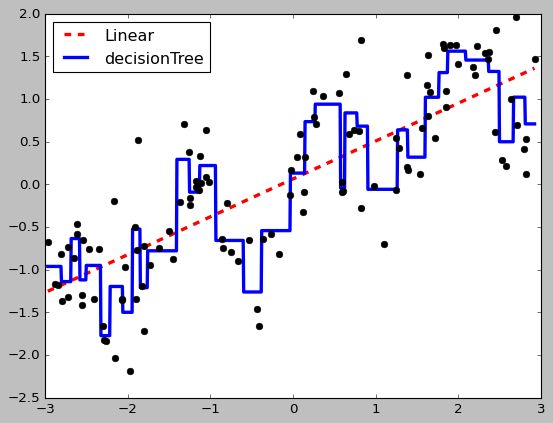

In [99]:
# 일반적인 방법

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from mglearn.datasets import make_wave

X,y = make_wave(n_samples=120)
line = np.linspace(X.min(), X.max(), 1000).reshape(-1,1)

lr = LinearRegression()
lr.fit(X,y)
plt.plot(line, lr.predict(line), '--', lw = 3, c = 'r', label = 'Linear')

dt = DecisionTreeRegressor(min_samples_leaf=3)
dt.fit(X,y)
plt.plot(line, dt.predict(line), lw = 3, c='b', label='decisionTree')

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc = 'best')



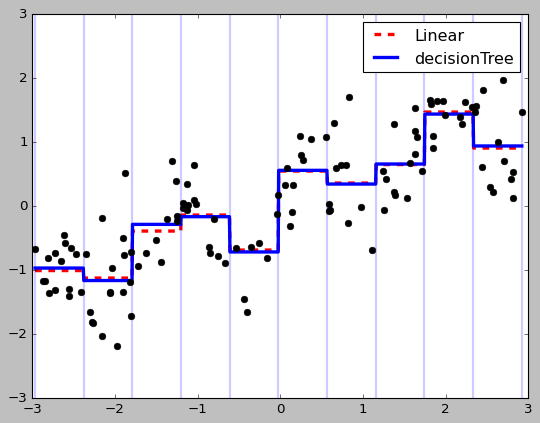

In [145]:
# 이산화를 이용한 방법
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy='uniform')
X_bined = kb.fit_transform(X).toarray()
line_bined = kb.transform(line).toarray()

lr.fit(X_bined, y)
plt.plot(line, lr.predict(line_bined), '--', lw = 3, c = 'r', label = 'Linear')

dt.fit(X_bined, y)
plt.plot(line, dt.predict(line_bined), lw = 3, c='b', label='decisionTree')

plt.vlines(kb.bin_edges_[0], -3,3, alpha = 0.2, lw = 2)
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc = 'best')

# 이산화를 사용하니 선형회귀를 사용한것과 결정트리회귀를 사용한 결과값이 거의 같다.

### 이산화를 사용하니 회귀모델은 좀 더 유연해졌고 결정트리 모델은 덜 유연해졌다.
### 결정트리 모델은 자신이 직접 구간을 나눠 학습하므로 인위적으로 구간을 나누는 것이 아무런 득이 되지 않는다.


### 결론 : 선형회귀 모델보다 결정트리 모델이 성과가 더 좋지만 만약 데이터가 크고 고차원이라 결정트리 모델이 적합하지 않는다면 이산화를 사용한 후 선형회귀 모델을 사용하는 것도 한 방법이 될 수 있다.

# 상호작용과 다항식

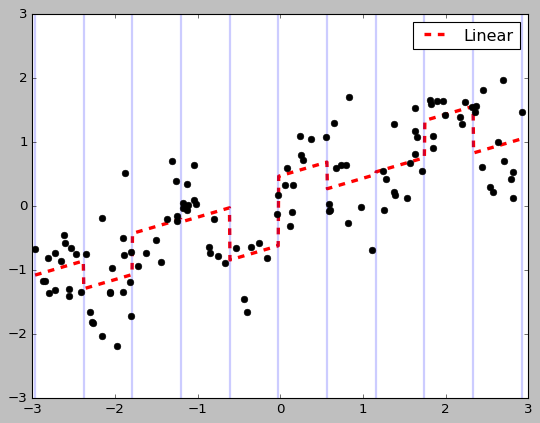

In [146]:
# X와 X_bined 를 결합한 경우 -> 각 구간에서 기울기를 학습했다.
# 하지만 각 구간마다 기울기가 모두 동일하다.

X_combined = np.hstack([X, X_bined])
line_combined = np.hstack([line, line_bined])

lr.fit(X_combined, y)
plt.plot(line, lr.predict(line_combined), '--', lw = 3, c = 'r', label = 'Linear')

plt.vlines(kb.bin_edges_[0], -3,3, alpha = 0.2, lw = 2)
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc = 'best')

In [147]:
print(X.shape)
print(X_bined.shape)
X_product = np.hstack([X_bined, X*X_bined])
print(X_product.shape)

(120, 1)
(120, 10)
(120, 20)


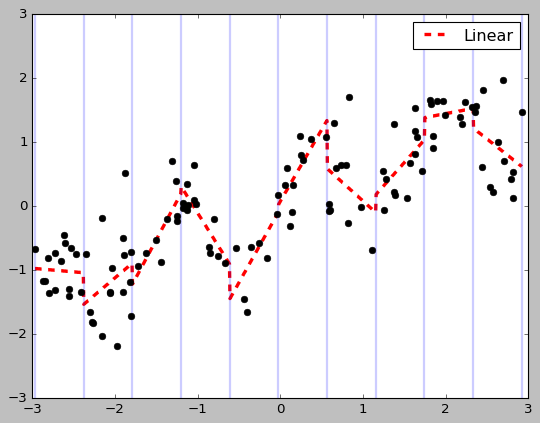

In [148]:
# X_bined 와 X*X_bined 를 결합한 경우
# X*X_bined X의 각 열을 X_bined의 각 열에 곱해준 것과 같다.

line_product = np.hstack([line_bined, line*line_bined])

lr.fit(X_product, y)
plt.plot(line, lr.predict(line_product), '--', lw = 3, c = 'r', label = 'Linear')

plt.vlines(kb.bin_edges_[0], -3,3, alpha = 0.2, lw = 2)
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc = 'best')

# 각 구간마다 기울기를 다르게 학습하였다.

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])